# Window Wizard
Calculates section properties of a thing with a hole in it, in either steel or aluminum.

In [1]:
#imports
from sectionproperties.pre.geometry import Geometry, CompoundGeometry
from sectionproperties.analysis.section import Section
from sectionproperties.pre.pre import Material
from IPython.display import Markdown

materials = {}

steel = Material(name='Steel', elastic_modulus=200e3, poissons_ratio=0.3, density=7.85e-6,
                 yield_strength=500, color='grey')
materials.update({"steel": steel})
aluminum_6063_T6 = Material(name = 'Aluminum 6063-T6', elastic_modulus = 70e3, poissons_ratio=0.33,
                            density = 2.6e-6, yield_strength=170, color='cyan')
materials.update({"aluminum_6063_T6": aluminum_6063_T6})
aluminum_6061_T6 = Material(name = 'Aluminum 6061-T6', elastic_modulus = 70e3, poissons_ratio=0.33,
                            density = 2.6e-6, yield_strength=240, color='cyan')
materials.update({"aluminum_6061_T6": aluminum_6061_T6})


#inputs
dxf_filename_add_shape = "_default.dxf"
dxf_filename_subtract_shape = "_none.dxf"
drawing_units = "in"
user_material = aluminum_6063_T6
mesh_size = 0.005
output_dir = r"C:\Users\Public\Documents"

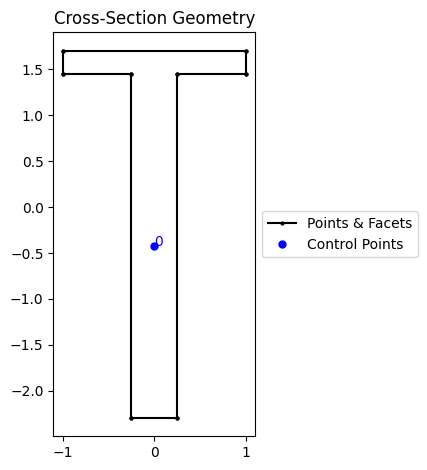

C:\Users\KPreston\Miniconda3\lib\site-packages\rich\live.py:229: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\KPreston\Miniconda3\lib\site-packages\sectionproperties\analysis\section.py:198: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.mesh_search_tree = STRtree(p_mesh)


Mesh Statistics:

- 1643 nodes

- 760 elements

- 1 region

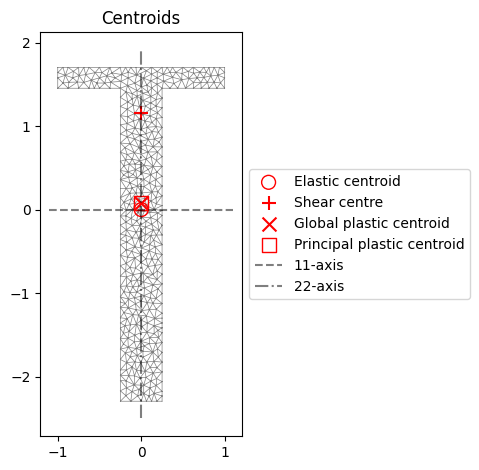

   Section Properties   
┏━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Property ┃     Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━┩
│ A        │  2.375000 │
│ Perim.   │ 12.000000 │
│ Qx       │ -0.000000 │
│ Qy       │ -0.000000 │
│ cx       │ -0.000000 │
│ cy       │ -0.000000 │
│ Ixx_g    │  3.778817 │
│ Iyy_g    │  0.205729 │
│ Ixy_g    │ -0.000000 │
│ Ixx_c    │  3.778817 │
│ Iyy_c    │  0.205729 │
│ Ixy_c    │ -0.000000 │
│ Zxx+     │  2.217684 │
│ Zxx-     │  1.645789 │
│ Zyy+     │  0.205729 │
│ Zyy-     │  0.205729 │
│ rx       │  1.261381 │
│ ry       │  0.294318 │
│ phi      │  0.000000 │
│ I11_c    │  3.778817 │
│ I22_c    │  0.205729 │
│ Z11+     │  2.217684 │
│ Z11-     │  1.645789 │
│ Z22+     │  0.205729 │
│ Z22-     │  0.205729 │
│ r11      │  1.261381 │
│ r22      │  0.294318 │
│ J        │  0.163650 │
│ Iw       │  0.162642 │
│ x_se     │ -0.000011 │
│ y_se     │  1.154393 │
│ x_st     │ -0.000011 │
│ y_st     │  1.154393 │
│ x1_se    │ -0.000011 │
│ y2_se    │  1.154393 │
│ A_sx     │  0.707994 │
│ A_sy     │  1.694548 │
│ A_s11    │  0.707994 │
│ A_s22    │  1.694548 │
│ betax+   │  2.490905 │
│ betax-   │ -2.490905 │
│ betay+   │ -0.000022 │
│ betay-   │  0.000022 │
│ beta11+  │  2.490905 │
│ beta11-  │ -2.490905 │
│ beta22+  │ -0.000022 │
│ beta22-  │  0.000022 │
│ x_pc     │ -0.000000 │
│ y_pc     │  0.078947 │
│ Sxx      │  2.632812 │
│ Syy      │  0.484375 │
│ SF_xx+   │  1.187190 │
│ SF_xx-   │  1.599727 │
│ SF_yy+   │  2.354430 │
│ SF_yy-   │  2.354430 │
│ x11_pc   │ -0.000000 │
│ y22_pc   │  0.078947 │
│ S11      │  2.632812 │
│ S22      │  0.484375 │
│ SF_11+   │  1.187190 │
│ SF_11-   │  1.599727 │
│ SF_22+   │  2.354430 │
│ SF_22-   │  2.354430 │
└──────────┴───────────┘

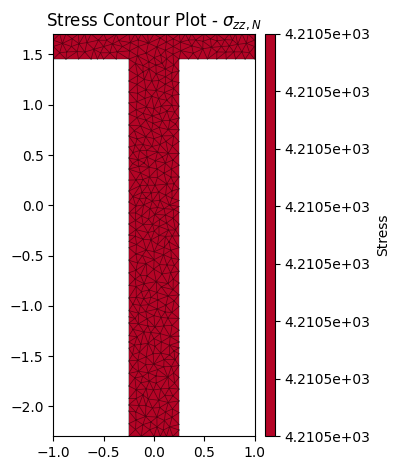

<AxesSubplot:title={'center':'Stress Contour Plot - $\\sigma_{zz,N}$'}>

In [2]:
outline = CompoundGeometry.from_dxf(dxf_filepath=dxf_filename_add_shape)
try: 
    holes = CompoundGeometry.from_dxf(dxf_filepath = dxf_filename_subtract_shape)
    geom = outline - holes
except:
    geom = outline
geom = geom.align_center()

geom.plot_geometry()

geom.create_mesh(mesh_sizes=mesh_size)  # Adds the mesh to the geometry

sect = Section(geom, time_info=True)
sect.calculate_geometric_properties()
sect.display_mesh_info()
sect.calculate_plastic_properties()
sect.calculate_warping_properties()

sect.plot_centroids()
sect.display_results('0.6f')

stress_post = sect.calculate_stress(N=10e3)
stress_post.plot_stress_n_zz()